In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the wine dataset
wine_data = pd.read_csv('winequality-red.csv')

# Split the dataset into features (X) and target (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate RMSE on test data
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf:.4f}")

Random Forest RMSE: 0.5489


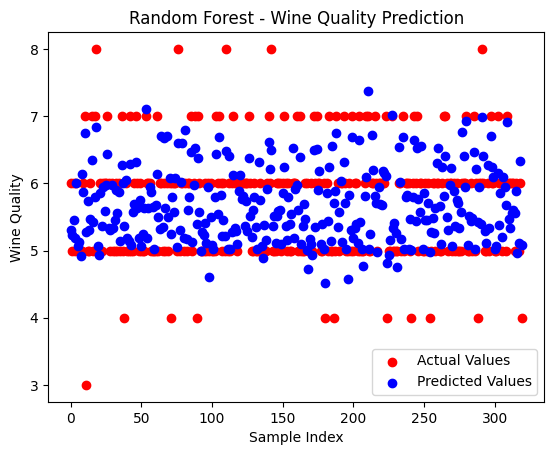

In [2]:
# Plotting actual vs predicted values for a subset of test data
plt.figure()
plt.scatter(range(len(y_test)), y_test, color='r', label='Actual Values')
plt.scatter(range(len(y_pred_rf)), y_pred_rf, color='b', label='Predicted Values')
plt.title("Random Forest - Wine Quality Prediction")
plt.xlabel('Sample Index')
plt.ylabel('Wine Quality')
plt.legend()
plt.show()

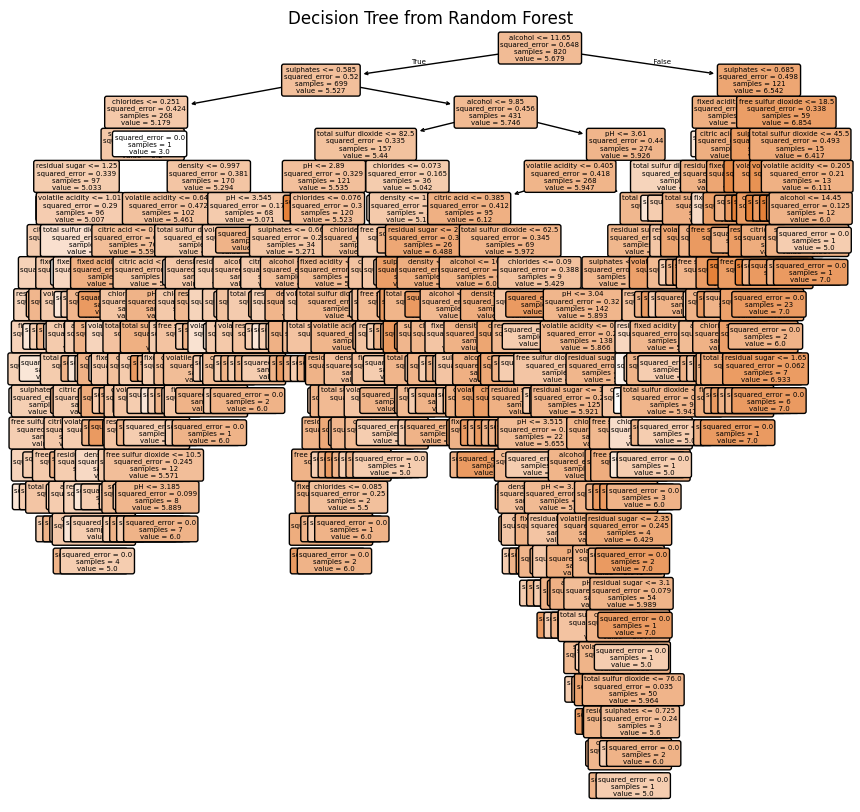

In [3]:
# Visualize one of the trees from the Random Forest
plt.figure(figsize=(10, 10))  # Set the figure size for better readability
tree_index = 0  # Choose the index of the tree to visualize
plot_tree(
    rf_model.estimators_[tree_index], 
    feature_names=X.columns, 
    filled=True, 
    rounded=True, 
    fontsize=5
)
plt.title(f"Decision Tree from Random Forest")
plt.show()

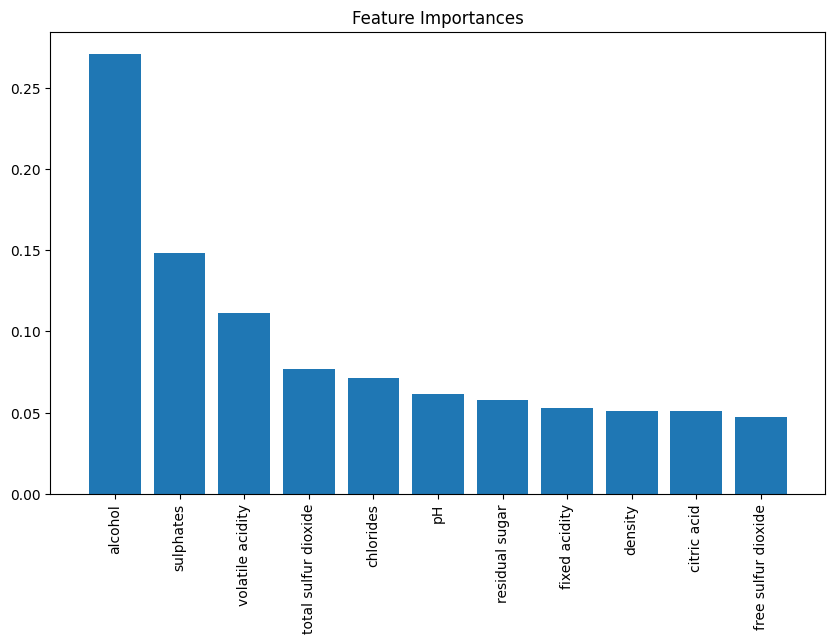

In [4]:
# Feature importance plot
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

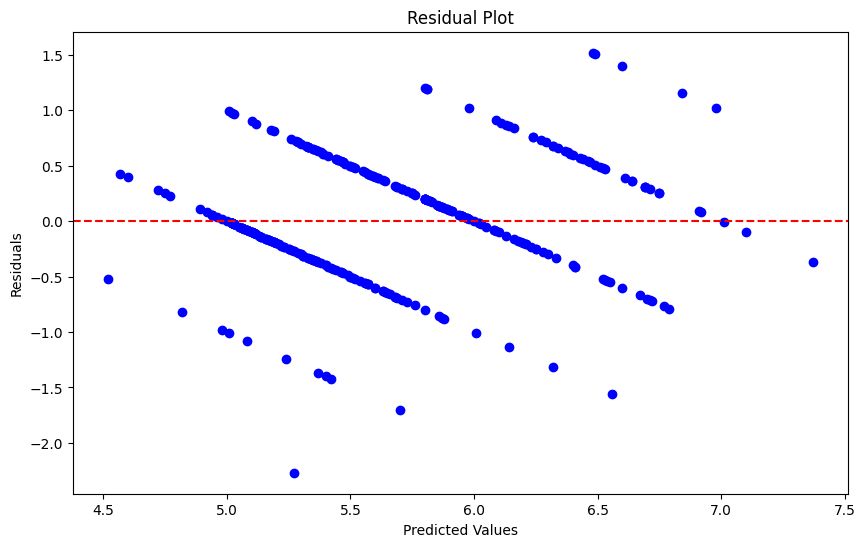

In [5]:
# Residuals plot
residuals = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, color='b')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

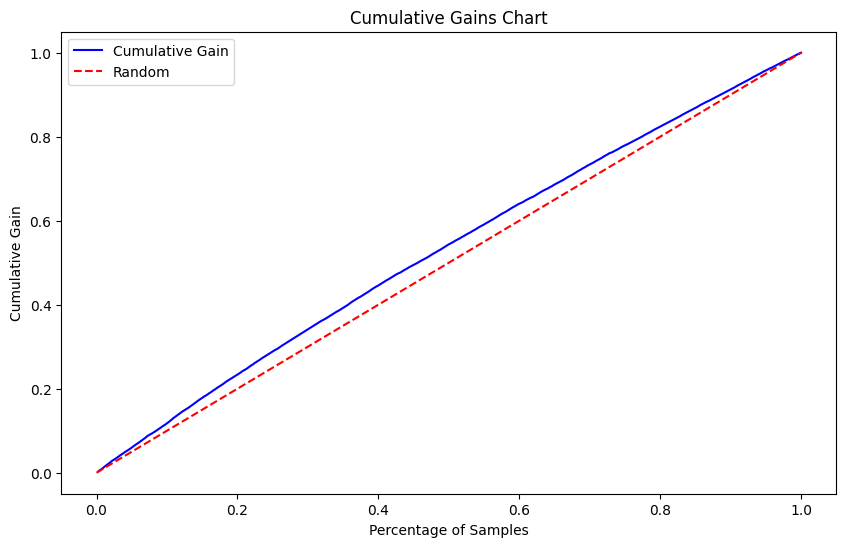

In [6]:
# Cumulative gains chart
def cumulative_gain(y_true, y_scores):
    data = pd.DataFrame({'true': y_true, 'score': y_scores})
    data.sort_values(by='score', ascending=False, inplace=True)
    data['cumulative_true'] = data['true'].cumsum()
    data['cumulative_all'] = range(1, len(data) + 1)
    return data['cumulative_true'] / data['true'].sum(), data['cumulative_all'] / len(data)

gain_true, gain_all = cumulative_gain(y_test, y_pred_rf)

plt.figure(figsize=(10, 6))
plt.plot(gain_all, gain_true, label='Cumulative Gain', color='b')
plt.plot([0, 1], [0, 1], label='Random', color='r', linestyle='--')
plt.title("Cumulative Gains Chart")
plt.xlabel("Percentage of Samples")
plt.ylabel("Cumulative Gain")
plt.legend()
plt.show()

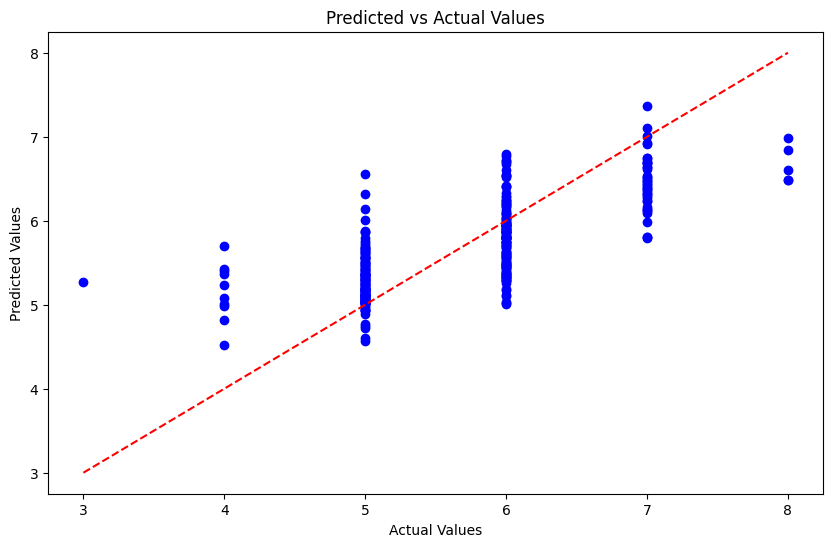

In [7]:
# Prediction error vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='r', linestyle='--')  # Line of perfect prediction
plt.title("Predicted vs Actual Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()